<a href="https://colab.research.google.com/github/sunilkonatham/basicPythonForDataScience/blob/master/Computer_vision_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

In [68]:
images_path = '/content/drive/MyDrive/cnn_image_usecase/archive/images'
annotations_path = '/content/drive/MyDrive/cnn_image_usecase/archive/annotations'

In [69]:
images = sorted(os.listdir(images_path))

annotations = sorted(os.listdir(annotations_path))

In [70]:
len(images)

852

In [71]:
len(annotations)

852

In [72]:
images[132]

'maksssksksss218.png'

In [73]:
annotations[132]

'maksssksksss218.xml'

In [74]:
#Exporting the labels present in the annotations file
def generate_label_dictionary(annotations_locations):

  with open(annotations_locations) as annotations_file:
    soup = BeautifulSoup(annotations_file.read(), 'xml')
    objects = soup.find_all('object')
    number_persons = len(objects)

  boxes = []
  labels = []

  for obj in objects:
    if obj.find('name').text == 'without_mask':
      labels.append(0)
    elif obj.find('name').text == 'with_mask':
      labels.append(2)
    elif obj.find('name').text == 'mask_weared_incorrect':
      labels.append(1)
    else:
      break
    
    xmin = int(obj.find('xmin').text)
    ymin = int(obj.find('ymin').text)
    xmax = int(obj.find('xmax').text)
    ymax = int(obj.find('ymax').text)
    boxes.append([xmin,ymin,xmax,ymax])
  
  boxes = np.array(boxes)
  labels = np.array(labels)

  target = {}
  target['labels'] = labels
  target['boxes'] = boxes

  return target, number_persons



In [75]:
target_number = []
persons_number = []

for file in annotations:
  file_path = annotations_path +'/'+ file
  target_image, number_of_persons_in_each_image = generate_label_dictionary(file_path)
  #print(file_path)
  #print(target_image)
  target_number.append(target_image)
  #print(number_of_persons_in_each_image)
  persons_number.append(number_of_persons_in_each_image)



In [76]:
from IPython.display import Image

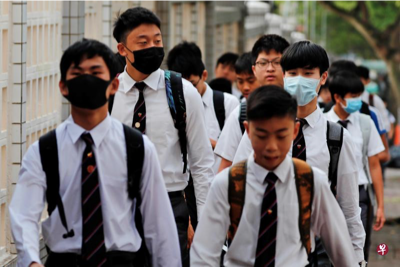

In [77]:
Image(filename='/content/drive/MyDrive/cnn_image_usecase/archive/images/maksssksksss131.png')

In [78]:
target_number[0]

{'boxes': array([[ 79, 105, 109, 142],
        [185, 100, 226, 144],
        [325,  90, 360, 141]]), 'labels': array([0, 2, 0])}

In [79]:
np.sum(persons_number)

4071

In [80]:
from tensorflow.keras.applications.vgg19 import preprocess_input


In [85]:
face_images =[]
face_labels =[]

image_size = 224
#Google about zip and enumerate
for i, path in enumerate(images):
  images_loaded = cv2.imread(images_path +'/'+ path)
  #print(i)
  #print(images_path +'/' +path)
  for j in range(0, persons_number[i]):
    face_loc = target_number[i]['boxes'][j]

    #print(face_loc[1])
    temp_face = images_loaded[face_loc[1]:face_loc[3],face_loc[0]:face_loc[2]]
    temp_face = cv2.resize(temp_face, (image_size, image_size))
    temp_face = preprocess_input(temp_face)
    face_images.append(temp_face)
    face_labels.append(target_number[i]['labels'][j])

face_images = np.array(face_images)
face_labels = np.array(face_labels)

print(face_images.shape, face_labels.shape)


(4071, 224, 224, 3) (4071,)


In [86]:
print(face_labels)

[0 2 0 ... 1 2 2]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


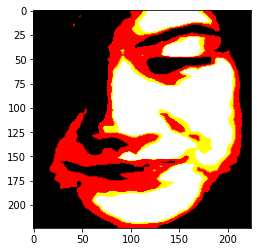

In [94]:

plt.imshow(face_images[2])

In [95]:
face_labels[2]

0